# Section 1:

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

trainingData = pd.read_csv("Data/1-training-data.csv")
testData = pd.read_csv("Data/1-test-data.csv")

In [2]:
trainX = trainingData[['x.1', 'x.2']]
trainY = trainingData['y']

In [3]:
testX = testData[['x.1', 'x.2']]
testY = testData['y']

### (a) Fit KNN with K = 1, 6, 11, . . . , 200.

In [4]:
ks = np.arange(1,200,5)
ks = np.append(ks, 200)
print(ks[len(ks)-1])
nks = ks.shape

err_rate_train = np.zeros(nks)
err_rate_test = np.zeros(nks)

k_opti = 0
for i,k in enumerate(ks):
    mod = KNeighborsClassifier(n_neighbors=k)
    mod.fit(trainX, trainY)
    mod_train = mod.predict(trainX)
    mod_test = mod.predict(testX)
    err_rate_train[i] = 1- (mod_train == trainY).mean()
    err_rate_test[i] = 1- (mod_test == testY).mean()
    if err_rate_test[i] < err_rate_test[k_opti]:
        k_opti = i
print(err_rate_train[k_opti])
print(err_rate_test[k_opti])

200
0.11829999999999996
0.11499999999999999


### (b) Plot training and test error rates against K. Explain what you observe. Is it consistent with what you expect from the class?

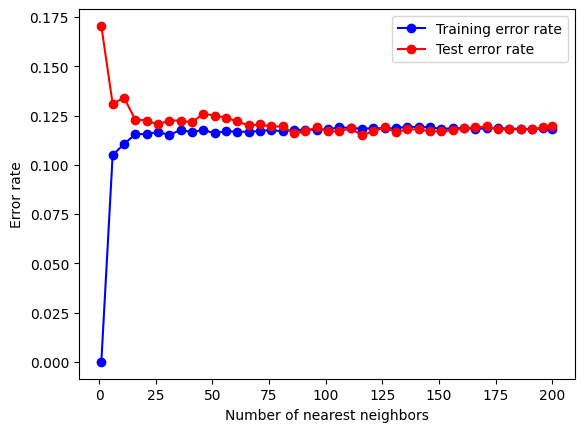

In [5]:
plt.plot(ks, err_rate_train, "bo-", label= "Training error rate")
plt.plot(ks, err_rate_test, "ro-", label= "Test error rate" )
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Error rate')
plt.legend(loc="best")
plt.show()

* The plot is consistent with what is expected from class. Plotting k values further shows that the test error rate begins
to rise and seperate from the training error rate, supporting the horse show figure. Training error increases as K increases.

### (c) What is the optimal value of K? What are the training and test error rates associated with the optimal K?

In [6]:
print(ks[k_opti])
k_opt = ks[k_opti]
n_grid = 50
x1_grid = np.linspace(min(trainX['x.1']), max(trainX['x.1']), num = n_grid)
x2_grid = np.linspace(min(trainX['x.2']), max(trainX['x.2']), num = n_grid)
xx, yy = np.meshgrid(x1_grid,x2_grid, indexing = 'ij')
grid = np.hstack((xx.reshape([-1,1]), yy.reshape([-1,1])))
print(grid.shape)

mod = KNeighborsClassifier(n_neighbors=k_opt)
mod.fit(trainX.to_numpy(), trainY)

prob = mod.predict_proba(grid)[:,1]
probs = prob.reshape([n_grid, n_grid])

116
(2500, 2)


### (d) Make a plot of the training data that also shows the decision boundary for the optimal K.

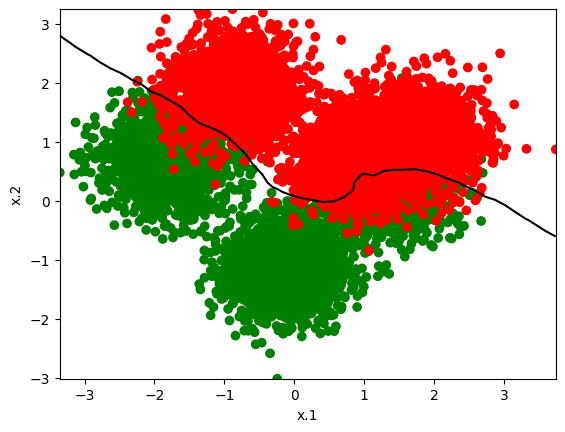

In [7]:
colors = {'yes':'green', 'no':'red'}
plt.scatter(trainingData['x.1'], trainingData['x.2'], c=trainingData['y'].map(colors))
plt.contour(xx, yy, probs, [0.5],colors = 'black')
plt.xlabel('x.1')
plt.ylabel('x.2')
plt.show()

### (e) Based on the decision boundary you obtained in (d), what phenomenon do you observe for points near the decision boundary? what phenomenon do you observe for points far from the decision boundary? (Are the points from one side of the decision boundary fall into the same class?) Do you think this decision boundary is sensible?

* The decision boundary splits the two different classes somewhat clearly. The two sides of the decision boundary have clear majorities of a particular class. I believe this decision boundary is sensible.

# Section 2:

Consider the following general model for the training data (Yi, xi), i = 1, . . . , n in a learning problem:

Yi = f(xi) + ϵi

where f is the true mean response function; and the random errors ϵi have mean zero, variance σ2,
and are mutually independent. We discussed this model in the class. Let ˆf be the estimator of f
obtained from the training data. Further, let (x0, Y0) be a test observation. In other words, x0 is a
future value of x at which we want to predict Y and Y0 is the corresponding true value of Y . The
test observation follows the same model as the training data, i.e.,

Y0 = f(x0) + ϵ0,

where ϵ0 has the same distribution as the ϵi for the training data but ϵ0 is independent of the ϵi.
Let Yˆ0 = ˆf(x0) be the predicted value of Y0.

(a) Show that MSE{ˆf(x0)} = (Bias{ˆf(x0)})2 + var{ˆf(x0)}.

![Section2a Solution](section2a.png "Section2a Solution")

(b) Show that E(Yˆ0 − Y0)2 = (Bias{ˆf(x0)})2 + var{ˆf(x0)} + σ2.

(c) Based on the phenomenon of “bias and variance trade off ”, explain why there is usually a “U”
    shape for the test MSE when the model flexibility increases.

* When model flaxibility increases, the square bias decreases and the variance increases. However, they change at different rates.